In [1]:
from matplotlib import font_manager as fm
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from data_fitting import *
import pandas as pd
import numpy as np
import itertools
import os

repo_root = os.path.dirname(os.getcwd())

colors = ['k']
for i in range(10):
    colors.append(plt.get_cmap('tab10')(i))

ERROR BARS False
No Error Bars


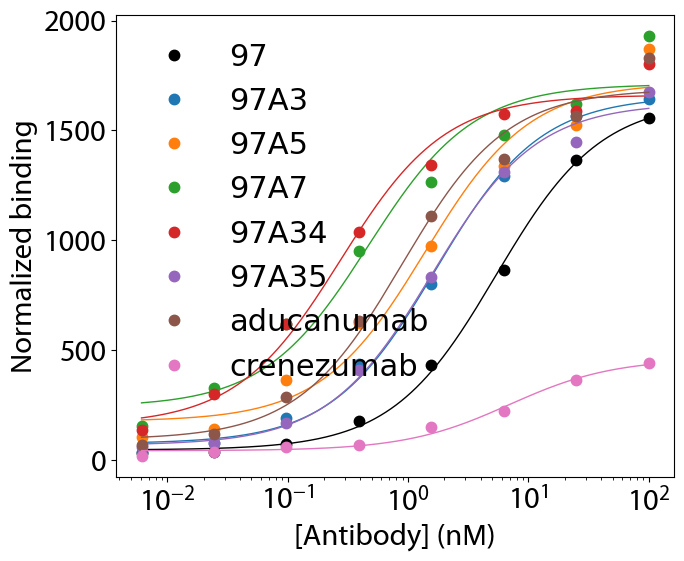

In [2]:
rep_1 = fit_data(
    data_excel = os.path.join(repo_root, "data", "97_maturation_fibril_binding.xlsx"), #Name of excel sheet or path to it.,
    curve_function = logistic, #python function defining curve you want to fit,
    number_fit_points = 100000,  #number of points to use for curve in graph, higher means smoother
    sheet_name='Rep 1',
    graph = True, #graphs the dataset and fitted curves if True
    bounds = ((0, 0, 0), (2000, 2000, 100)), #gives bounds on fitted parameters. see scipy.optimize.curve_fit
    log_x = True, #makes x-axis log scale
    log_y = False,
    fig_size = (7.2, 6), #specifies figure size
    error_bars = False, #specifies wheter there are errorbars with the data
    markersize = 15, #specifies size of data points
    #save_fig = 'Example_Graph.png', #file_name of saved graph.
    colors = colors, #list of colors for each dataset
    face = colors, #list of colors for each datapoint face
    xlims = None, #specifies x axis limits
    ylims = None, #specifies x axis limits
)

ERROR BARS False
No Error Bars


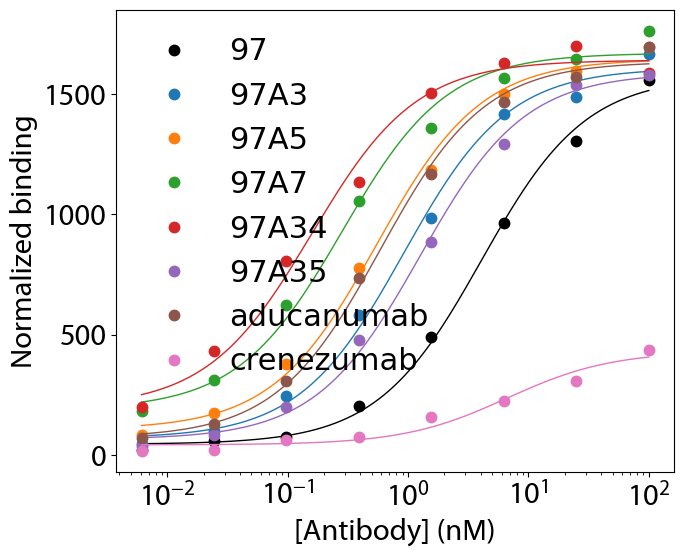

In [3]:
rep_2 = fit_data(
    data_excel = os.path.join(repo_root, "data", "97_maturation_fibril_binding.xlsx"), #Name of excel sheet or path to it.,
    curve_function = logistic, #python function defining curve you want to fit,
    number_fit_points = 100000,  #number of points to use for curve in graph, higher means smoother
    sheet_name='Rep 2',
    graph = True, #graphs the dataset and fitted curves if True
    bounds = ((0, 0, 0), (2000, 2000, 100)), #gives bounds on fitted parameters. see scipy.optimize.curve_fit
    log_x = True, #makes x-axis log scale
    log_y = False,
    fig_size = (7.2, 6), #specifies figure size
    error_bars = False, #specifies wheter there are errorbars with the data
    markersize = 15, #specifies size of data points
    #save_fig = 'Example_Graph.png', #file_name of saved graph.
    colors = colors, #list of colors for each dataset
    face = colors, #list of colors for each datapoint face
    xlims = None, #specifies x axis limits
    ylims = None, #specifies x axis limits
)

In [4]:
def average_result_dicts(result1, result2):
    avg_result = {}

    # Merge the two dicts
    for key in result1.keys():
        values1 = np.array(result1[key])
        values2 = np.array(result2[key])
        avg_result[key] = list((values1 + values2) / 2)

    return pd.DataFrame(avg_result)

def std_result_dicts(result1, result2):
    std_result = {}
    for key in result1.keys():
        std_result[f"{key}_std"] = [
            np.std([v1, v2], ddof=1)  # use sample std (ddof=1)
            for v1, v2 in zip(result1[key], result2[key])
        ]
    return pd.DataFrame(std_result)

_, _, legends_r1, _ = get_data(
    os.path.join(repo_root, "data", "97_maturation_fibril_binding.xlsx"),
    sheet_name = "Rep 1"
)

_, _, legends_r2, _ = get_data(
    os.path.join(repo_root, "data", "97_maturation_fibril_binding.xlsx"),
    sheet_name = "Rep 2"
)
legends_r1 = [str(l) for l in legends_r1]
legends_r2 = [str(l) for l in legends_r2]
# Makes sure order is the same
assert legends_r1 == legends_r2

fit_vals_1, std_vals_1 = rep_1
fit_vals_2, std_vals_2 = rep_2

avg_fit_df = average_result_dicts(fit_vals_1, fit_vals_2)
std_fit_df = std_result_dicts(fit_vals_1, fit_vals_2)

result_df = pd.concat([avg_fit_df, std_fit_df], axis = 1)
result_df.index = legends_r1
result_df = result_df[["T", "T_std", "B", "B_std", "EC50", "EC50_std"]]
result_df.to_csv(os.path.join(repo_root, "results", "Figure-3-Fits.csv"))

result_df

,T,T_std,B,B_std,EC50,EC50_std
97,1606.308294,43.380561,44.479157,1.876851,4.733772,0.925499
97A3,1632.876998,33.221665,71.165198,4.968858,1.307811,0.547231
97A5,1682.167434,49.664610,140.212109,50.569486,0.967946,0.590364
97A7,1691.148487,27.875398,214.348851,38.093888,0.376159,0.131062
97A34,1651.594698,13.425628,177.480422,26.306244,0.216718,0.082168
97A35,1606.800272,24.936932,65.279944,2.799307,1.418338,0.228755
aducanumab,1661.891298,36.756760,81.517547,16.401793,0.739312,0.214840
crenezumab,446.107544,21.912684,41.601220,1.204104,6.808819,0.166513


# Figure 3A

In [5]:
def transform_curve_parameters(params, i, norm_data):
    min_y = norm_data[i][0]
    max_y = norm_data[i][1]
    range_y = norm_data[i][2]
    
    T_normalized = (params['T'][i] - min_y) / range_y
    B_normalized = (params['B'][i] - min_y) / range_y
    
    EC50 = params['EC50'][i]
    
    return [T_normalized, B_normalized, EC50]


_, min_max_diff, _, _ = get_data(
    os.path.join(repo_root, "data", "97_maturation_fibril_binding.xlsx"),
    sheet_name = "minmax",
    error_bars = None
)

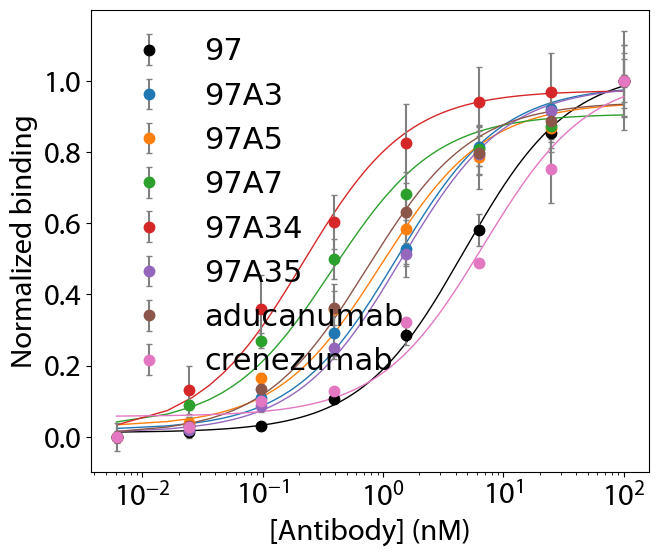

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (7.2, 6))

xdata, ydata, legends, axes_label, y_error = get_data(
    os.path.join(repo_root, "data", "97_maturation_fibril_binding.xlsx"),
    sheet_name = "Avg Normal",
    error_bars = "ERROR BARS"
)

for i, y in enumerate(ydata):
    graph_data(
        ax,
        xdata,
        y,
        curve_function_parameters = transform_curve_parameters(avg_fit_df.to_dict(), i, min_max_diff),
        legends = legends,
        axes_label = axes_label,
        curve_function = logistic,
        num_points = 10000,
        i = i,
        log_x = True,
        log_y = False,
        colors = colors,
        face = colors,
        y_error = y_error[i],
        markersize=15,
        xlims=None,
        ylims=None,
        fmt = "."
    )

plt.savefig(os.path.join(repo_root, "results", 'Figure-3A.pdf'), transparent = True, dpi = 600)

# Figure 3B

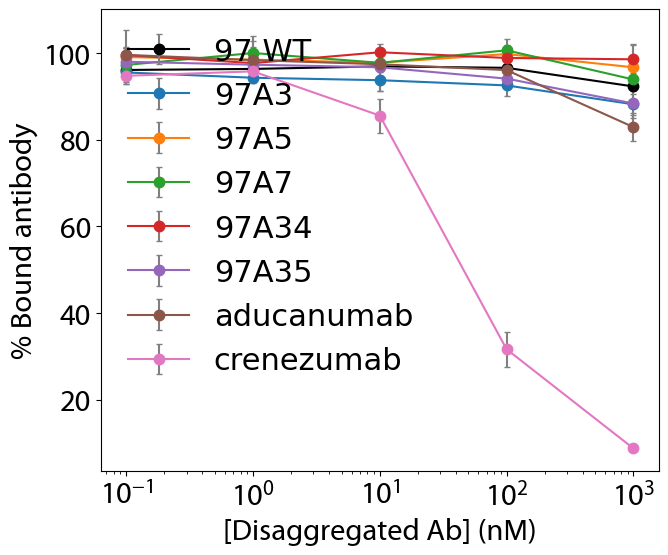

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (7.2, 6))

xdata, ydata, legends, axes_label, y_error = get_data(
    os.path.join(repo_root, "data", "97_maturation_monomer_competition.xlsx"),
    error_bars = "ERROR BAR"
)

for i, y in enumerate(ydata):
    graph_data(
        ax,
        xdata,
        y,
        curve_function_parameters = None,
        legends = legends,
        axes_label = axes_label,
        curve_function = None,
        num_points = 1,
        i = i,
        log_x = True,
        log_y = False,
        colors = colors,
        face = colors,
        y_error = y_error[i],
        markersize=15,
        xlims=None,
        ylims=None,
        fmt = ".-"
    )

plt.savefig(os.path.join(repo_root, "results", "Figure-3B.pdf"))